In [1]:
from tqdm import tqdm
import pandas as pd
import glob
import os
from scipy.sparse import csr_matrix
import numpy as np
import community
import networkx as nx
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt

In [2]:
def replace_multiple_strings(text, replacements):
    for old_str, new_str in replacements.items():
        text = text.replace(old_str, new_str)
    return text

In [3]:
def get_all_files(path, extension='.preprocessed'):
    return glob.glob(f"{path}/*{extension}")

In [4]:
def create_graph(path):
    edges_df = pd.read_csv(path)
    G = nx.from_pandas_edgelist(edges_df, edge_attr = True)
    nodes = list(G.nodes)
    replacements = {"step03": "step02", "interact": "alias"} 
    alias_path = replace_multiple_strings(path, replacements)
    alias_df = pd.read_csv(alias_path)
    for _, row in alias_df.iterrows():
        if row['name'] in nodes:
            names = eval(row['alias'])
            G.nodes[row['name']]['names'] = ";".join(names)
    return G

In [5]:
def create_graphs():
    paths = [
        'baseline/les_cavernes_d_acier/step03/', 
        'baseline/prelude_a_fondation/step03/'
    ]
        
    graph_dict = {'ID': [], 'graphml': []}
    graphs = {}
    for path in paths:
        all_chapter_path = get_all_files(path, ".interact")
        livre = replace_multiple_strings(path, {'baseline/':'','/step03/':''})
        print(f"Livre: {livre}")
        for chapter_path in all_chapter_path:
            key_1 = f'{path}chapter_'
            chapitre = replace_multiple_strings(chapter_path, 
                                                {
                                                    key_1:'',
                                                     '.txt.interact':''
                                                })
            G = create_graph(chapter_path)
            gid = f'{livre}_{chapitre}'
            graphs[gid] = G       
    return graphs

In [6]:
graphs = create_graphs()

Livre: les_cavernes_d_acier
Livre: prelude_a_fondation


In [7]:
len(graphs)

37

In [8]:
graphs.keys()

dict_keys(['les_cavernes_d_acier_18', 'les_cavernes_d_acier_7', 'les_cavernes_d_acier_15', 'les_cavernes_d_acier_12', 'les_cavernes_d_acier_6', 'les_cavernes_d_acier_1', 'les_cavernes_d_acier_13', 'les_cavernes_d_acier_14', 'les_cavernes_d_acier_3', 'les_cavernes_d_acier_4', 'les_cavernes_d_acier_16', 'les_cavernes_d_acier_11', 'les_cavernes_d_acier_5', 'les_cavernes_d_acier_2', 'les_cavernes_d_acier_10', 'les_cavernes_d_acier_17', 'les_cavernes_d_acier_8', 'les_cavernes_d_acier_9', 'prelude_a_fondation_19', 'prelude_a_fondation_18', 'prelude_a_fondation_7', 'prelude_a_fondation_15', 'prelude_a_fondation_12', 'prelude_a_fondation_6', 'prelude_a_fondation_1', 'prelude_a_fondation_13', 'prelude_a_fondation_14', 'prelude_a_fondation_3', 'prelude_a_fondation_4', 'prelude_a_fondation_16', 'prelude_a_fondation_11', 'prelude_a_fondation_5', 'prelude_a_fondation_2', 'prelude_a_fondation_10', 'prelude_a_fondation_17', 'prelude_a_fondation_8', 'prelude_a_fondation_9'])

In [9]:
def show_graph(graph, title):
    #from pylab import rcParams
    #rcParams['figure.figsize'] = 14, 10
    fig, ax = plt.subplots(figsize=(14, 10))
    pos = nx.circular_layout(graph, scale = 20)
    labels = nx.get_edge_attributes(graph, 'weight')
    d = dict(graph.degree)
    nx.draw(
        graph, 
        pos,
        node_color='lightblue', 
        alpha = 0.75,
        with_labels=True, 
        nodelist=d, 
        node_size=[d[k]*200 for k in d],
        edgelist = labels,
        ax=ax
    )
    nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
    plt.title(f'Graphe: {title}')
    plt.show()

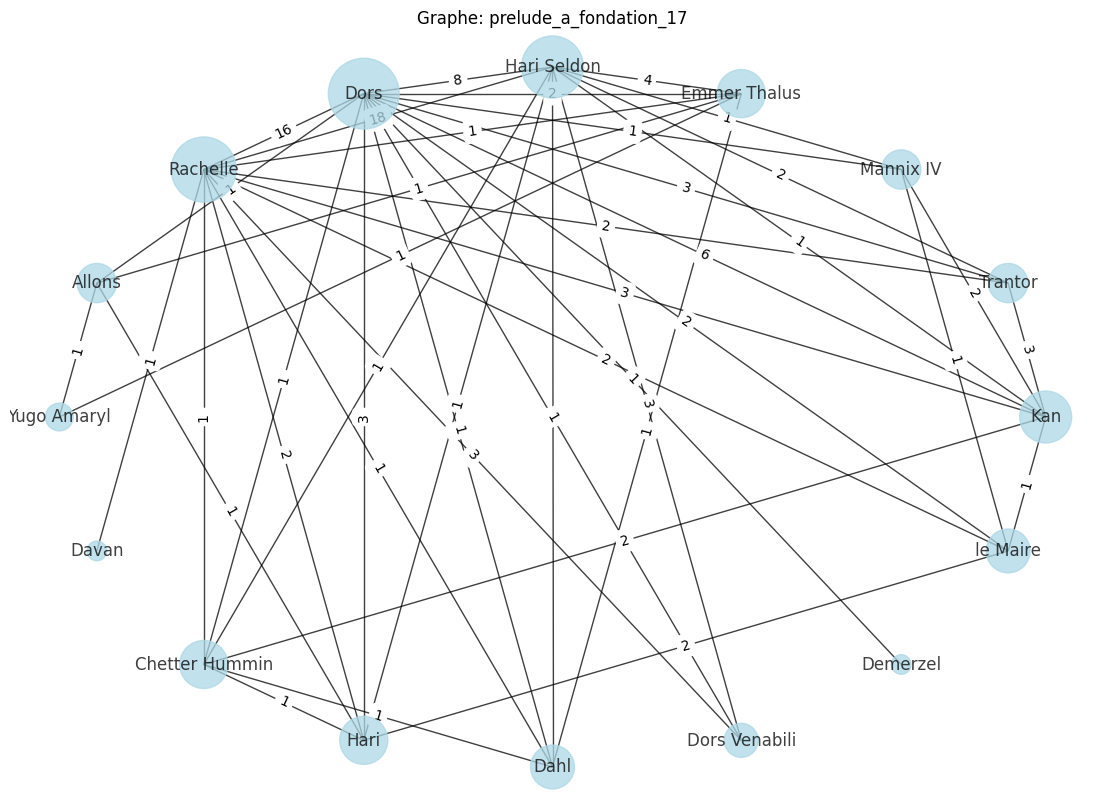

In [10]:
show_graph(graphs['prelude_a_fondation_17'], 'prelude_a_fondation_17')

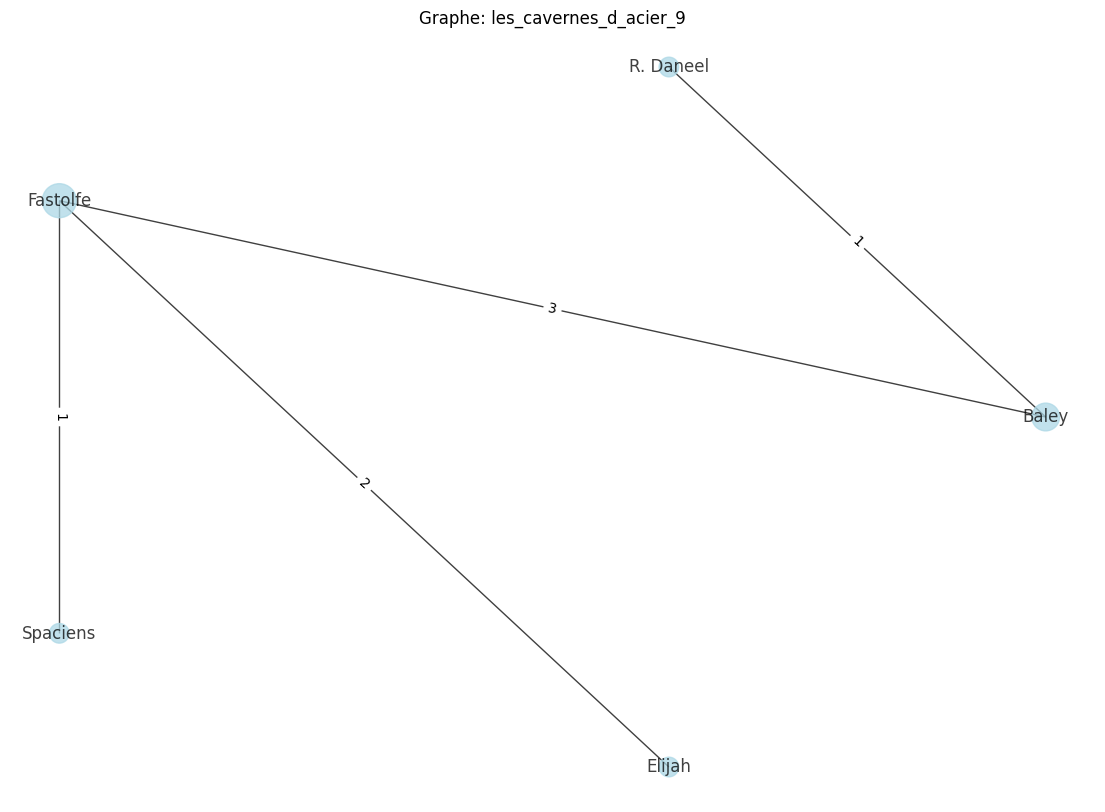

In [11]:
show_graph(graphs['les_cavernes_d_acier_9'], 'les_cavernes_d_acier_9')

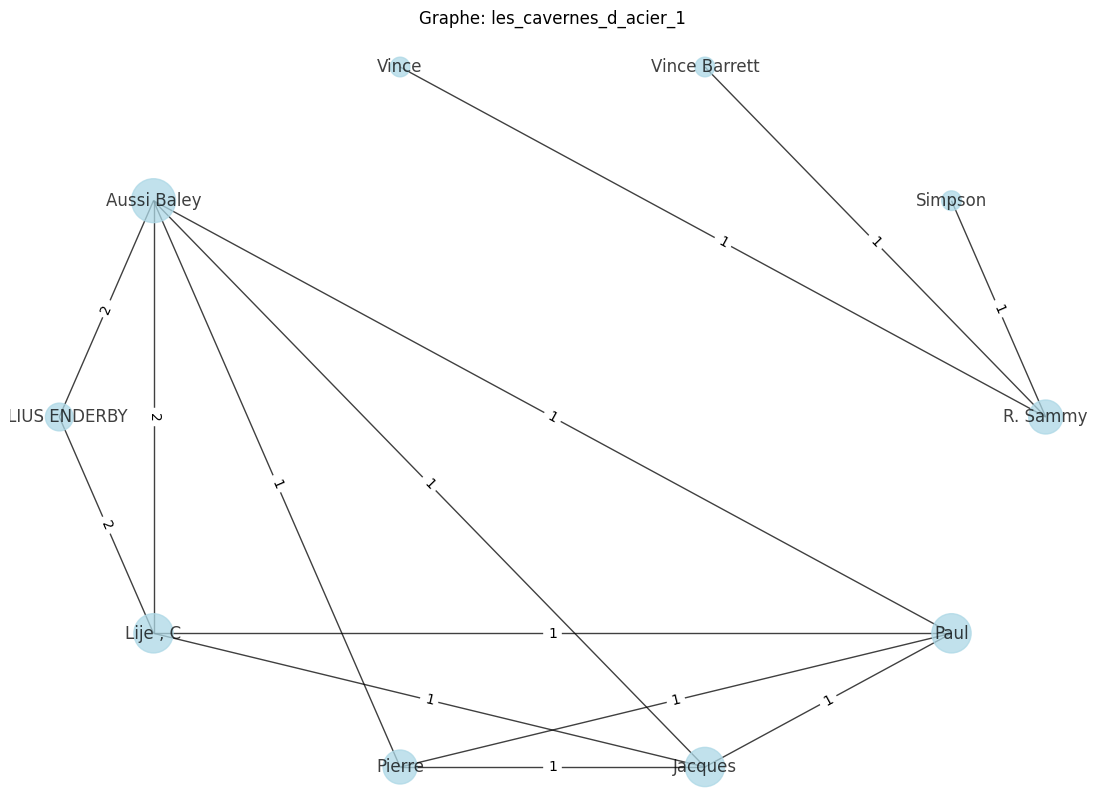

In [12]:
show_graph(graphs['les_cavernes_d_acier_1'], 'les_cavernes_d_acier_1')

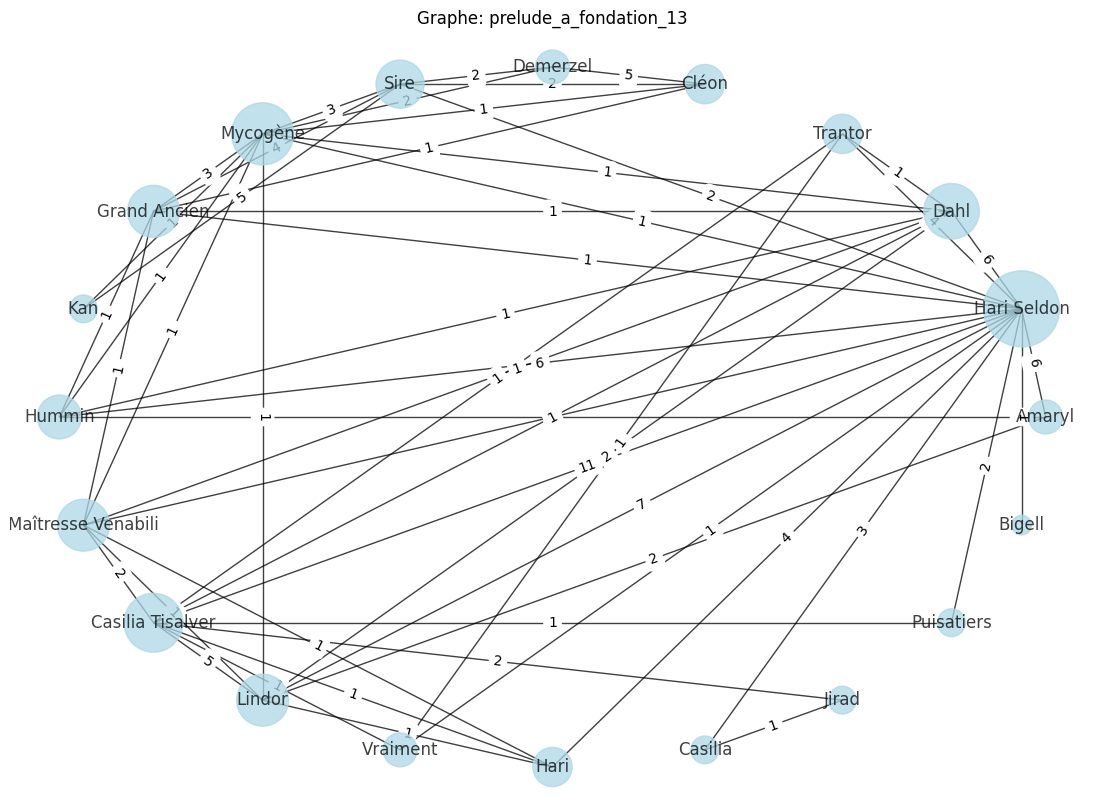

In [13]:
show_graph(graphs['prelude_a_fondation_13'], 'prelude_a_fondation_13')

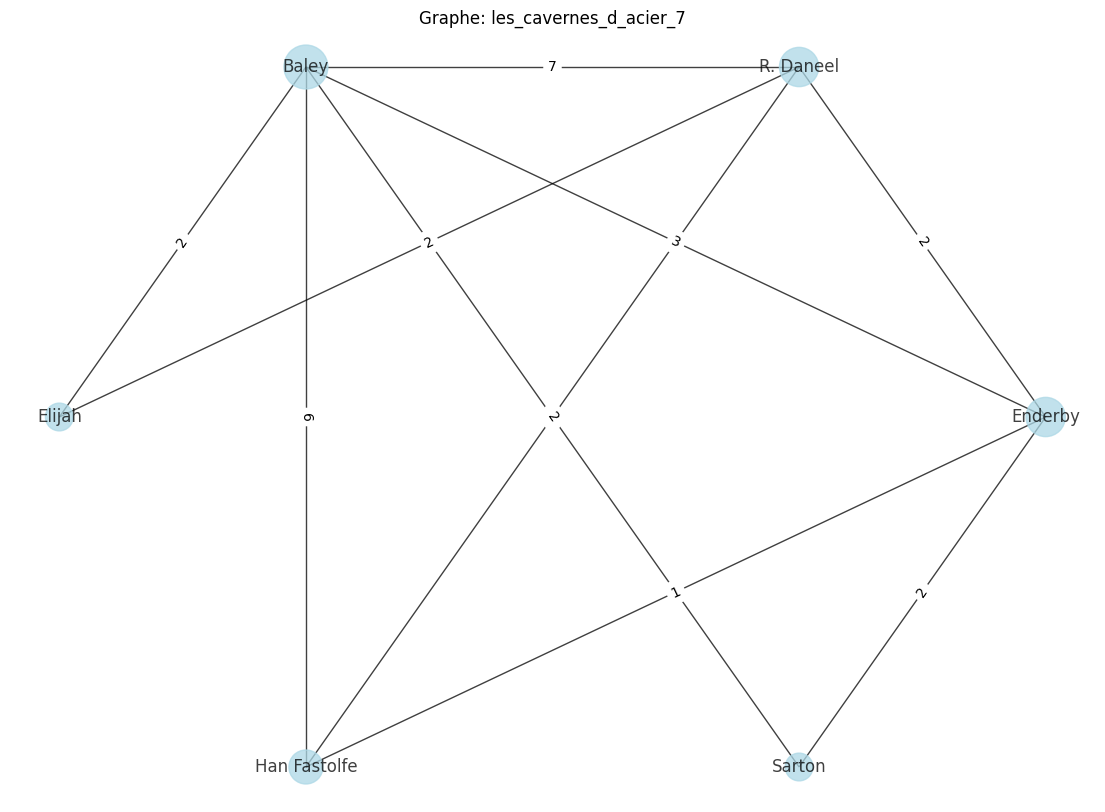

In [14]:
show_graph(graphs['les_cavernes_d_acier_7'], 'les_cavernes_d_acier_7')

In [15]:
def plot_pagerank(graph, title):

    pagerank_scores = nx.pagerank(graph)
    characters = list(pagerank_scores.keys())
    scores = list(pagerank_scores.values())

    plt.bar(characters, scores, color='skyblue')
    plt.xlabel('Characters')
    plt.ylabel('PageRank Score')
    plt.title('PageRank Scores for Characters')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.title(f'Graphe: {title}')
    plt.show()

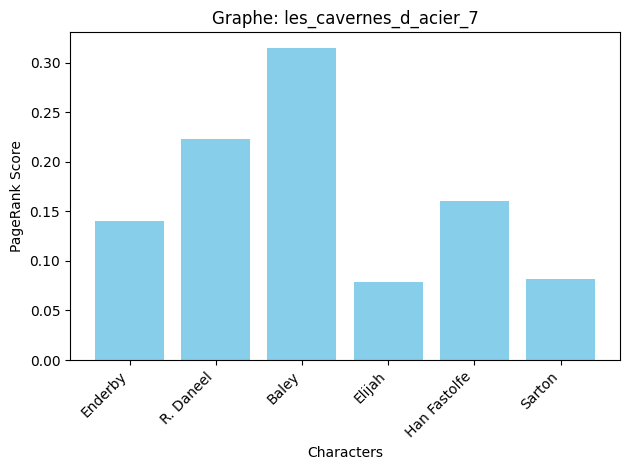

In [16]:
plot_pagerank(graphs['les_cavernes_d_acier_7'], 'les_cavernes_d_acier_7')

In [17]:
def plot_eigenvector(graph, title):
    
    eigenvector_scores = nx.eigenvector_centrality(graph, weight='weight')
    characters = list(eigenvector_scores.keys())
    scores = list(eigenvector_scores.values())

    plt.bar(characters, scores, color='skyblue')
    plt.xlabel('Characters')
    plt.ylabel('Eigenvector Score')
    plt.title('Eigenvector Score for Characters')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.title(f'Graphe: {title}')
    plt.show()

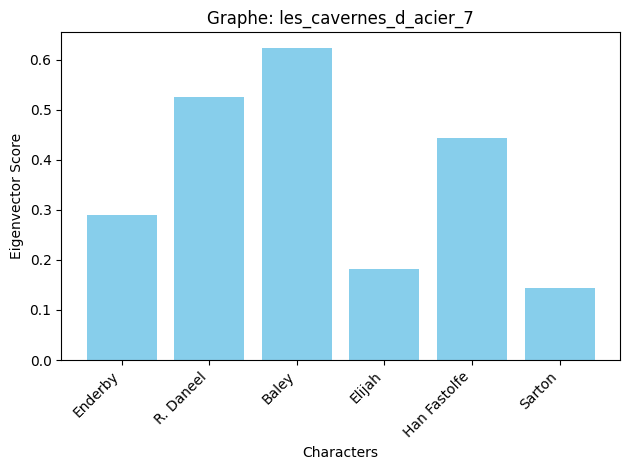

In [18]:
plot_eigenvector(graphs['les_cavernes_d_acier_7'], 'les_cavernes_d_acier_7')

In [19]:
def plot_betweeness(graph, title):
    
    betweenness_scores = nx.betweenness_centrality(graph, weight='weight', seed=0)
    characters = list(betweenness_scores.keys())
    scores = list(betweenness_scores.values())

    plt.bar(characters, scores, color='skyblue')
    plt.xlabel('Characters')
    plt.ylabel('Betweenness Score')
    plt.title('Betweenness Score for Characters')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.title(f'Graphe: {title}')
    plt.show()

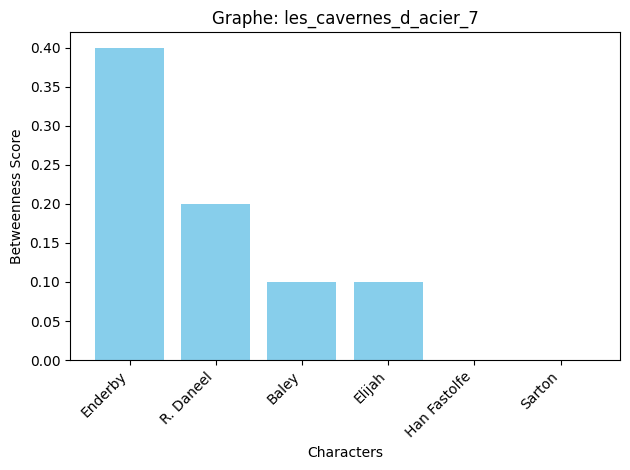

In [20]:
plot_betweeness(graphs['les_cavernes_d_acier_7'], 'les_cavernes_d_acier_7')

In [21]:
def plot_degree(graph, title):
    
    degree_scores = dict(nx.degree(graph, weight='weight'))
    characters = list(degree_scores.keys())
    scores = list(degree_scores.values())

    plt.bar(characters, scores, color='skyblue')
    plt.xlabel('Characters')
    plt.ylabel('Degree Score')
    plt.title('Degree Score for Characters')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.title(f'Graphe: {title}')
    plt.show()

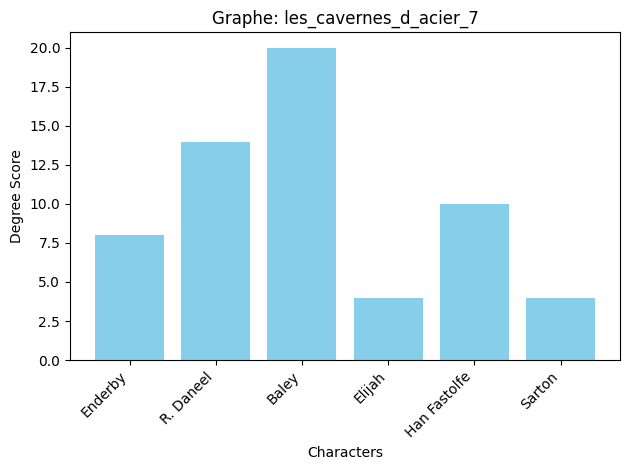

In [22]:
plot_degree(graphs['les_cavernes_d_acier_7'], 'les_cavernes_d_acier_7')

In [23]:
def plot_closeness(graph, title):
    
    closeness_scores = nx.closeness_centrality(graph)
    characters = list(closeness_scores.keys())
    scores = list(closeness_scores.values())

    plt.bar(characters, scores, color='skyblue')
    plt.xlabel('Characters')
    plt.ylabel('Closeness Score')
    plt.title('Closeness Score for Characters')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.title(f'Graphe: {title}')
    plt.show()

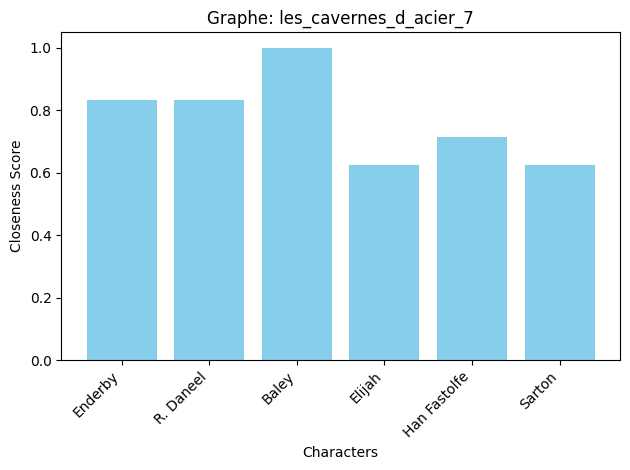

In [24]:
plot_closeness(graphs['les_cavernes_d_acier_7'], 'les_cavernes_d_acier_7')

In [25]:
def show_community_graph(graph, title):
    partition = community.best_partition(graph)
    fig, ax = plt.subplots(figsize=(14, 10))
    pos = nx.circular_layout(graph, scale = 20)
    labels = nx.get_edge_attributes(graph, 'weight')
    d = dict(graph.degree)
    nx.draw(
        graph, 
        pos,
        node_color=list(partition.values()),
        alpha = 0.75,
        with_labels=True, 
        nodelist=d, 
        node_size=[d[k]*200 for k in d],
        edgelist = labels,
        ax=ax
    )
    nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels)
    plt.title(f'Graphe: {title}')
    plt.show()

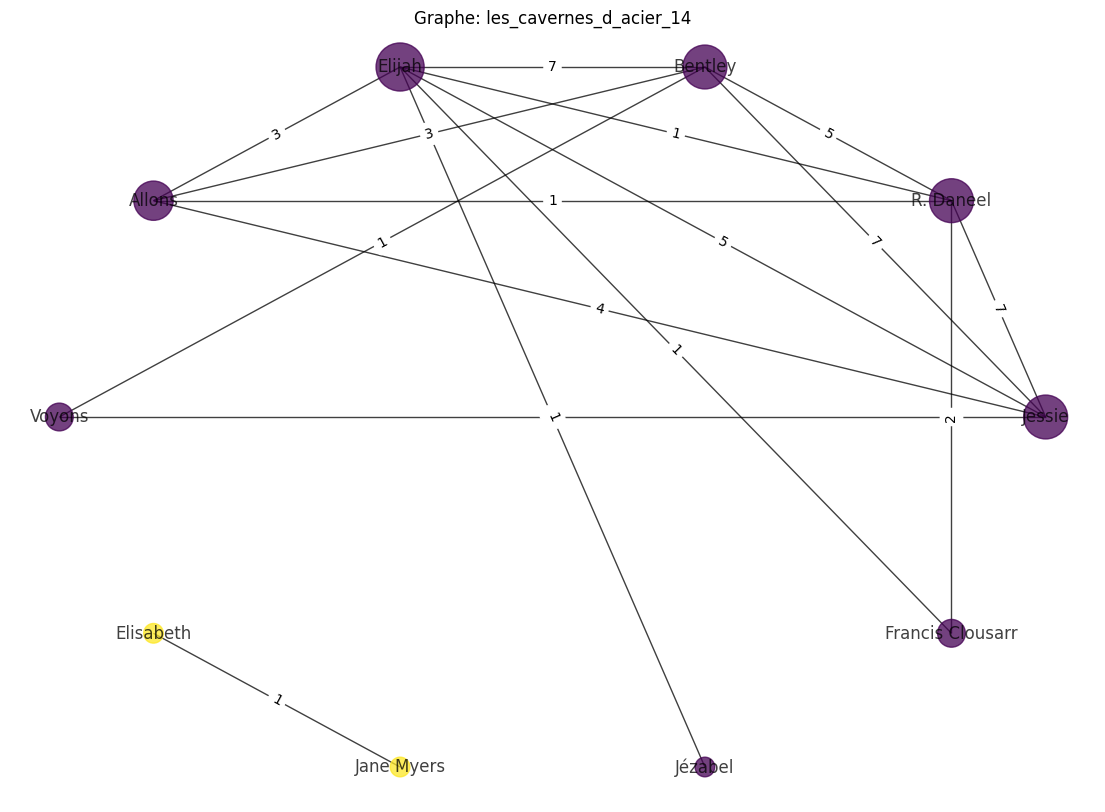

In [26]:
show_community_graph(graphs['les_cavernes_d_acier_14'], 'les_cavernes_d_acier_14')

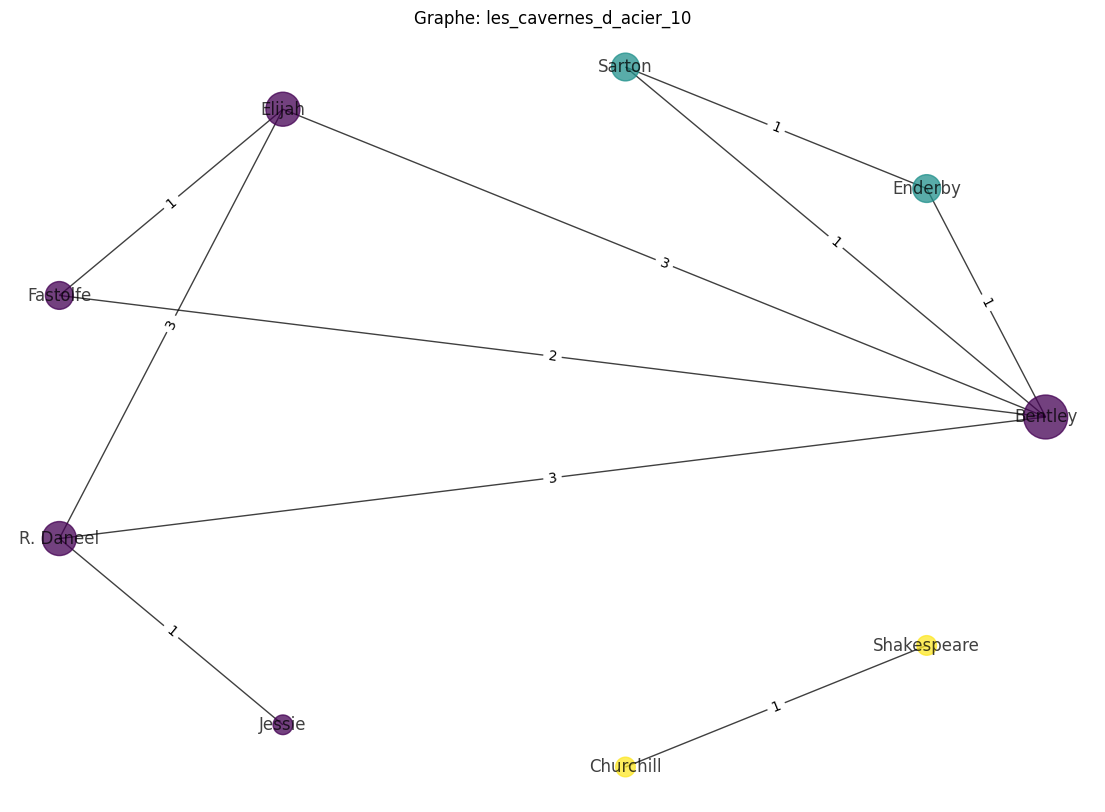

In [27]:
show_community_graph(graphs['les_cavernes_d_acier_10'], 'les_cavernes_d_acier_10')